<a href="https://colab.research.google.com/github/notsogeekynair/datascwpython/blob/main/data_science_with_python_assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
"""
Varun Nair
Class: CS 677
Date: 12/09/2024

Description : cleaning and labelling dataset
"""
import pandas as pd
data = pd.read_csv('/content/seeds_dataset.csv',names=['RawData'])


data= data["RawData"].str.split(r'\s+',expand = True)
data.columns =["area","perimeter","compactness","kernel_length","kernel_width","asymm_coeff","kernel_groove_length","class"]

for col in data.columns[:-1]:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data["class"]=data["class"].astype(int)

data.head()
data.dtypes

,area,perimeter,compactness,kernel_length,kernel_width,asymm_coeff,kernel_groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [20]:
"""
Varun Nair
Class: CS 677
Date: 12/09/2024
Homework Problem #1
Description :implementing SVM
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#choosing subset with labels 1 and 2
subset = data[data['class'].isin([1, 2])]

#seperating features
x=subset.drop(columns=["class"]).values
y=subset["class"].values

#splitting values 50/50
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5, random_state=154)#using last 3 numbers of bu id for random state

def svm_classifier(kernel_type,degree=None):
  if kernel_type == "linear":
    clf = SVC(kernel=kernel_type,random_state=154)
  elif kernel_type == "poly":
    clf = SVC(kernel=kernel_type,degree=degree,random_state=154)
  elif kernel_type == "rbf":
    clf = SVC(kernel=kernel_type,random_state=15)
  else :
    print("Invalid kernel type")

  #model fit
  clf.fit(xtrain,ytrain)
  #predictions
  ypred = clf.predict(xtest)
  #accuracy
  accuracy = accuracy_score(ytest,ypred)
  #confusion matrix
  cm=confusion_matrix(ytest,ypred)
  #classificaion report
  report = classification_report(ytest,ypred)
  return accuracy,report,cm

#for linear kernel svm
acclinear,reportlinear,cmlinear=svm_classifier("linear")
print("Accuracy for Linear Kernel SVM : ",acclinear)
print("Confusion Matrix for Linear Kernel SVM : \n",cmlinear)
print("Classification Report for Linear Kernel SVM : \n",reportlinear)
#for rbf kernel svm
accrbf,reportrbf,cmrbf=svm_classifier("rbf")
print("Accuracy for RBF Kernel SVM : ",accrbf)
print("Confusion Matrix for RBF Kernel SVM : \n",cmrbf)
print("Classification Report for RBF Kernel SVM : \n",reportrbf)
#for polynomial kernel svm
accpoly,reportpoly,cmpoly=svm_classifier("poly",degree=3)
print("Accuracy for Polynomial Kernel SVM : ",accpoly)
print("Confusion Matrix for Polynomial Kernel SVM : \n",cmpoly)
print("Classification Report for Polynomial Kernel SVM : \n",reportpoly)


Accuracy for Linear Kernel SVM :  0.9428571428571428
Confusion Matrix for Linear Kernel SVM : 
 [[36  3]
 [ 1 30]]
Classification Report for Linear Kernel SVM : 
               precision    recall  f1-score   support

           1       0.97      0.92      0.95        39
           2       0.91      0.97      0.94        31

    accuracy                           0.94        70
   macro avg       0.94      0.95      0.94        70
weighted avg       0.94      0.94      0.94        70

Accuracy for RBF Kernel SVM :  0.9571428571428572
Confusion Matrix for RBF Kernel SVM : 
 [[37  2]
 [ 1 30]]
Classification Report for RBF Kernel SVM : 
               precision    recall  f1-score   support

           1       0.97      0.95      0.96        39
           2       0.94      0.97      0.95        31

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70

Accuracy for Polynomial Kerne

In [21]:
"""
Varun Nair
Class: CS 677
Date: 12/09/2024
Homework Problem #2
Description :implementing Naive Bayes
"""
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
accuracy = accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
report = classification_report(ytest,ypred)

print("Accuracy for Naive Bayes : ",accuracy)
print("Confusion Matrix for Naive Bayes : \n",cm)
print("Classification Report for Naive Bayes : \n",report)

Accuracy for Naive Bayes :  0.9428571428571428
Confusion Matrix for Naive Bayes : 
 [[36  3]
 [ 1 30]]
Classification Report for Naive Bayes : 
               precision    recall  f1-score   support

           1       0.97      0.92      0.95        39
           2       0.91      0.97      0.94        31

    accuracy                           0.94        70
   macro avg       0.94      0.95      0.94        70
weighted avg       0.94      0.94      0.94        70



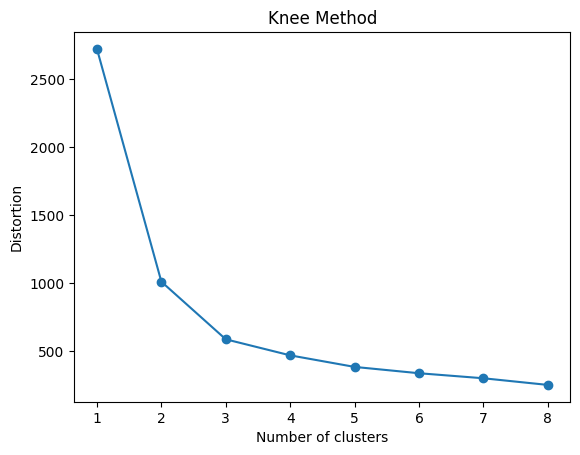

In [23]:
"""
Varun Nair
Class: CS 677
Date: 12/09/2024
Homework Problem #3 Part 1
Description :implementing k means clustering and visualising it
"""
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

fullx =data.drop(columns=["class"]).values
fully = data["class"].values

distortions = []
k = range(1,9)
for i in k:
  kmeans = KMeans(n_clusters=i,random_state=154)
  kmeans.fit(fullx)
  distortions.append(kmeans.inertia_)

#plotting
plt.plot(k,distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Knee Method')
plt.show()


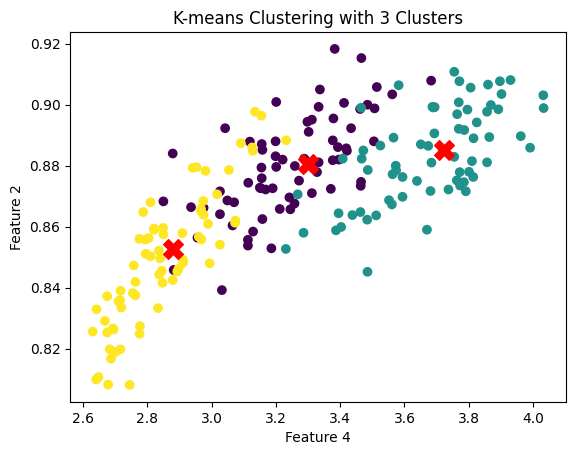

In [39]:
"""
Varun Nair
Class: CS 677
Date: 12/09/2024
Homework Problem #3 Part 2
Description :implementing k means for the best k
"""
import random

kmeans = KMeans(n_clusters=3,random_state=154)
y_kmeans= kmeans.fit(fullx)

fi,fj = random.sample(range(fullx.shape[1]),2)

#plot data points
plt.scatter(fullx[:,fi],fullx[:,fj],c=fully,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, fi], kmeans.cluster_centers_[:, fj], c='red', s=200, marker='X')
plt.xlabel(f'Feature {fi}')
plt.ylabel(f'Feature {fj}')
plt.title(f'K-means Clustering with {3} Clusters')
plt.show()

In [61]:
from itertools import count
"""
Varun Nair
Class: CS 677
Date: 12/09/2024
Homework Problem #3 Part 3
Description :assigning cluster label bsaed on majority class
"""

from scipy.stats import mode

labels = fully
y_kmeans = kmeans.fit_predict(fullx)

cluster_labels = []

for i in range(3):
    cluster_indices = np.where(y_kmeans == i)[0]
    cluster_classes = labels[cluster_indices]
    mode_result = mode(cluster_classes)
    majority_class = mode_result.mode
    cluster_labels.append(majority_class)

#Printing centroids and assigned labels
for i in range(3):
    print(f"Cluster {i+1} centroid: {kmeans.cluster_centers_[i]}")
    print(f"Cluster {i+1} assigned label: {cluster_labels[i]}")



Cluster 1 centroid: [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
  6.06609836]
Cluster 1 assigned label: 2
Cluster 2 centroid: [11.98865854 13.28439024  0.85273659  5.22742683  2.88008537  4.58392683
  5.0742439 ]
Cluster 2 assigned label: 3
Cluster 3 centroid: [14.81910448 14.53716418  0.88052239  5.59101493  3.29935821  2.70658507
  5.21753731]
Cluster 3 assigned label: 1


In [64]:
"""
Varun Nair
Class: CS 677
Date: 12/09/2024
Homework Problem #3 Part 4
Description :multi label classifier
"""
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances

a_centroid = kmeans.cluster_centers_[2] #cluster 3 centroid (label 1)
b_centroid = kmeans.cluster_centers_[1] #cluster 2 centroid (label 3)
c_centroid = kmeans.cluster_centers_[0] #cluster 1 centroid (label 2)

#calculating distances
distances_to_a = pairwise_distances(fullx, [a_centroid])
distances_to_b = pairwise_distances(fullx, [b_centroid])
distances_to_c = pairwise_distances(fullx, [c_centroid])

assigned_labels = np.argmin(np.concatenate([distances_to_a, distances_to_b, distances_to_c], axis=1), axis=1)

new_labels = np.where(assigned_labels == 0, 1,
                      np.where(assigned_labels == 1, 3, 2))
accuracy = np.sum(new_labels == fully) / len(fully)


print(f"Accuracy of the new classifier: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(fully, new_labels))

Accuracy of the new classifier: 0.8904761904761904
Confusion Matrix:
[[57  1 12]
 [10 60  0]
 [ 0  0 70]]


In [68]:
"""
Varun Nair
Class: CS 677
Date: 12/09/2024
Homework Problem #3 Part 5
Description : calculating accuracy and confusion matrix for new classifier
"""
from scipy.spatial.distance import cdist

centroids ={
    1:kmeans.cluster_centers_[2],
    2:kmeans.cluster_centers_[0]
}
#calculate distance from each point from centroid
distances = cdist(x,list(centroids.values()),metric ='euclidean')

#assign label
predicted =np.argmin(distances,axis=1)+1

#filtering out label 3
mask = (predicted == 1) | (predicted == 2)
xfiltered = x[mask]
yfiltered = y[mask]
predictedfiltered = predicted[mask]
#calculating accuracy and confusion matrix
print("Accuracy of the new classifier on Class 1 and Class 2:", accuracy_score(yfiltered, predictedfiltered))
print("Confusion Matrix of the new classifier on Class 1 and Class 2:")
print(confusion_matrix(yfiltered, predictedfiltered))

Accuracy of the new classifier on Class 1 and Class 2: 0.9214285714285714
Confusion Matrix of the new classifier on Class 1 and Class 2:
[[69  1]
 [10 60]]
